<a href="https://colab.research.google.com/github/ivonnelinares10-prog/2025IIMLAceleradores/blob/main/MLEA_IvHubMetrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
  <img src="https://www.dropbox.com/scl/fi/fqv8wxrh2fzpp9nudoum8/LogoEscuela.png?rlkey=g2keqeitv28yzatqs75odkqbq&st=k1urhxs6&dl=1" alt="Logo Escuela" width="200">
</p>

#Machine Learning Methods Applied to Real-World Data Coursework for the Machine Learning class, Data Science Master's Program, Escuela Colombiana de Ingeniería Julio Garavito. Bogotá D.C.

A Repository of

**Profesores:** <br>
Ivan Olier Caparroso <br>
Mario Julian Cañon Ayala <br>


**Estudiantes:** <br>
Huber Camilo Borja Amaya <br>
Ivonne Elena Linares Cortés <br>


**2025 Semestre 2**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [ ]:
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Importación de datos y estadísticas

In [ ]:
# Conexión con las tablas de trabajo subidas a Github

base = 'https://raw.githubusercontent.com/ivonnelinares10-prog/2025_II_MLAceleradores/main/'

metadata = pd.read_csv(base + 'metadata.csv')
metadata_kaggle = pd.read_csv(base + 'metadata_kaggle.csv')
metadata_test = pd.read_csv(base + 'metadata_test.csv')
predictions_sample = pd.read_csv(base + 'predictions_sample.csv')
signals = pd.read_csv(base + 'signals.csv')
signals_kaggle = pd.read_csv(base + 'signals_kaggle.csv')
signals_test = pd.read_csv(base + 'signals_test.csv')

In [ ]:
metadata.head()

,user_snippet,x-axis__sum_values,x-axis__median,x-axis__mean,x-axis__length,x-axis__standard_deviation,x-axis__variance,x-axis__root_mean_square,x-axis__maximum,x-axis__absolute_maximum,x-axis__minimum,y-axis__sum_values,y-axis__median,y-axis__mean,y-axis__length,y-axis__standard_deviation,y-axis__variance,y-axis__root_mean_square,y-axis__maximum,y-axis__absolute_maximum,y-axis__minimum,z-axis__sum_values,z-axis__median,z-axis__mean,z-axis__length,z-axis__standard_deviation,z-axis__variance,z-axis__root_mean_square,z-axis__maximum,z-axis__absolute_maximum,z-axis__minimum,activity
0,525_0,-247.31,-1.805,-2.4731,100.0,4.379826,19.182875,5.029821,7.31,12.41,-12.41,824.44,8.805,8.2444,100.0,6.756690,45.652857,10.659408,19.50,19.50,-3.79,-221.780000,-1.440000,-2.217800,100.0,3.088071,9.536183,3.801949,2.91000,12.95000,-12.950000,Jogging
1,525_1,566.93,5.595,5.6693,100.0,2.906785,8.449399,6.371057,14.10,14.10,-0.95,824.65,8.390,8.2465,100.0,2.530549,6.403677,8.626033,13.21,13.21,3.45,122.351584,-0.251976,1.223516,100.0,4.499906,20.249155,4.663276,14.47843,14.47843,-5.053149,Walking
2,525_2,-568.61,-5.305,-5.6861,100.0,6.393058,40.871192,8.555871,8.62,18.24,-18.24,736.43,6.435,7.3643,100.0,6.799682,46.235681,10.023402,19.31,19.31,-4.99,56.390000,0.950000,0.563900,100.0,5.376821,28.910208,5.406310,12.79000,15.75000,-15.750000,Jogging
3,525_3,-137.60,-1.990,-1.3760,100.0,3.538268,12.519340,3.796408,8.89,9.70,-9.70,778.99,7.830,7.7899,100.0,7.468088,55.772343,10.791426,19.57,19.57,-4.52,-361.040000,-2.775000,-3.610400,100.0,3.235463,10.468218,4.848011,1.80000,10.88000,-10.880000,Jogging
4,525_4,-583.99,-5.000,-5.8399,100.0,6.513692,42.428177,8.748292,6.51,18.96,-18.96,472.93,4.120,4.7293,100.0,5.761811,33.198469,7.454176,19.27,19.27,-6.82,-445.670000,-3.375000,-4.456700,100.0,5.149686,26.519264,6.810392,7.40000,15.83000,-15.830000,Jogging


In [ ]:
metadata_kaggle.head()

,user_snippet,x-axis__sum_values,x-axis__median,x-axis__mean,x-axis__length,x-axis__standard_deviation,x-axis__variance,x-axis__root_mean_square,x-axis__maximum,x-axis__absolute_maximum,x-axis__minimum,y-axis__sum_values,y-axis__median,y-axis__mean,y-axis__length,y-axis__standard_deviation,y-axis__variance,y-axis__root_mean_square,y-axis__maximum,y-axis__absolute_maximum,y-axis__minimum,z-axis__sum_values,z-axis__median,z-axis__mean,z-axis__length,z-axis__standard_deviation,z-axis__variance,z-axis__root_mean_square,z-axis__maximum,z-axis__absolute_maximum,z-axis__minimum
0,8054_0,880.46,8.560,8.8046,100.0,5.146708,26.488599,10.198509,19.53,19.53,-1.04,517.84,4.615,5.1784,100.0,3.806477,14.489265,6.426904,17.24,17.24,-2.49,-6.605867,-0.762740,-0.066059,100.0,3.058799,9.356253,3.059513,9.615966,9.615966,-9.152874
1,8054_1,552.88,5.520,5.5288,100.0,0.039173,0.001535,5.528939,5.63,5.63,5.43,251.05,2.530,2.5105,100.0,0.028333,0.000803,2.510660,2.56,2.56,2.45,823.670000,8.240000,8.236700,100.0,0.037445,0.001402,8.236785,8.310000,8.310000,8.120000
2,8054_2,848.84,8.045,8.4884,100.0,4.789062,22.935113,9.746181,19.57,19.57,-1.50,528.33,4.805,5.2833,100.0,3.656953,13.373308,6.425462,14.29,14.29,-2.79,-7.995144,-0.211115,-0.079951,100.0,3.178891,10.105348,3.179896,9.656827,9.656827,-7.014479
3,8054_3,100.93,0.990,1.0093,100.0,0.044525,0.001983,1.010282,1.12,1.12,0.89,992.36,9.920,9.9236,100.0,0.020373,0.000415,9.923621,10.00,10.00,9.89,29.770000,0.310000,0.297700,100.0,0.032058,0.001028,0.299421,0.340000,0.340000,0.190000
4,8054_4,845.52,7.970,8.4552,100.0,4.858636,23.606345,9.751756,19.57,19.57,-2.45,523.32,4.770,5.2332,100.0,3.628599,13.166734,6.368133,15.51,15.51,-2.83,1.757024,-0.483522,0.017570,100.0,3.475728,12.080686,3.475773,10.310603,10.310603,-9.956474


In [ ]:
metadata_test.head()

,user_snippet,x-axis__sum_values,x-axis__median,x-axis__mean,x-axis__length,x-axis__standard_deviation,x-axis__variance,x-axis__root_mean_square,x-axis__maximum,x-axis__absolute_maximum,x-axis__minimum,y-axis__sum_values,y-axis__median,y-axis__mean,y-axis__length,y-axis__standard_deviation,y-axis__variance,y-axis__root_mean_square,y-axis__maximum,y-axis__absolute_maximum,y-axis__minimum,z-axis__sum_values,z-axis__median,z-axis__mean,z-axis__length,z-axis__standard_deviation,z-axis__variance,z-axis__root_mean_square,z-axis__maximum,z-axis__absolute_maximum,z-axis__minimum,activity
0,3006_0,190.60,1.365,1.9060,100.0,6.192680,38.349290,6.479362,19.50,19.50,-10.46,1042.50,10.895,10.4250,100.0,5.416010,29.333159,11.747927,19.57,19.57,-0.72,-73.61,-0.950,-0.7361,100.0,3.607485,13.013948,3.681819,10.19,10.19,-9.92,Walking
1,3006_1,-115.08,-2.070,-1.1508,100.0,5.779997,33.408361,5.893446,16.82,16.82,-12.49,1052.22,10.590,10.5222,100.0,5.516254,30.429053,11.880478,19.57,19.57,0.61,-13.61,-0.420,-0.1361,100.0,3.551672,12.614374,3.554279,9.47,11.75,-11.75,Walking
2,3006_2,-171.08,-1.710,-1.7108,100.0,5.347172,28.592243,5.614186,13.95,13.95,-11.69,1051.39,10.420,10.5139,100.0,5.421342,29.390952,11.829330,19.57,19.57,0.53,-13.96,-0.480,-0.1396,100.0,2.636698,6.952178,2.640391,8.35,8.50,-8.50,Walking
3,3006_3,633.38,5.790,6.3338,100.0,5.019286,25.193234,8.081476,18.77,18.77,-5.90,915.69,9.130,9.1569,100.0,4.155381,17.267191,10.055646,19.57,19.57,-1.46,26.10,-0.995,0.2610,100.0,4.298020,18.472975,4.305937,11.75,11.75,-8.35,Downstairs
4,3006_4,160.75,1.880,1.6075,100.0,5.769199,33.283657,5.988966,19.50,19.50,-7.78,1035.09,10.440,10.3509,100.0,5.305685,28.150288,11.631484,19.57,19.57,-0.61,-43.41,-0.630,-0.4341,100.0,3.324155,11.050006,3.352380,12.03,12.03,-8.27,Walking


In [ ]:
predictions_sample.head()

,user_snippet,prediction
0,8054_0,Walking
1,8054_1,Downstairs
2,8054_2,Standing
3,8054_3,Sitting
4,8054_4,Upstairs


In [ ]:
signals.head()

,user_snippet,x-axis,y-axis,z-axis,timestamp
0,525_0,1.57,-0.61,-0.65,0.0
1,525_0,-1.12,1.84,-1.46,50.0
2,525_0,5.48,14.14,-5.71,100.0
3,525_0,-12.41,10.53,-5.52,150.0
4,525_0,-1.14,10.50,2.91,200.0


In [ ]:
signals_kaggle.head()

,user_snippet,x-axis,y-axis,z-axis,timestamp
0,8054_0,17.67,0.84,-2.179256,0.0
1,8054_0,13.57,1.42,4.099725,50.0
2,8054_0,13.80,10.00,-3.255263,100.0
3,8054_0,11.22,13.57,-2.751310,150.0
4,8054_0,4.48,7.27,0.422231,200.0


In [ ]:
signals_test.head()

,user_snippet,x-axis,y-axis,z-axis,timestamp
0,3006_0,-8.58,1.65,-2.83,0.0
1,3006_0,8.81,12.45,5.90,50.0
2,3006_0,16.40,15.98,1.69,100.0
3,3006_0,-3.21,9.34,5.79,150.0
4,3006_0,-4.33,15.89,-7.44,200.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Training set
acceledata = pd.read_csv('/content/drive/MyDrive/Coursework/metadata.csv')
print(acceledata.shape)
acceledata.head()

(6310, 32)


,user_snippet,x-axis__sum_values,x-axis__median,x-axis__mean,x-axis__length,x-axis__standard_deviation,x-axis__variance,x-axis__root_mean_square,x-axis__maximum,x-axis__absolute_maximum,x-axis__minimum,y-axis__sum_values,y-axis__median,y-axis__mean,y-axis__length,y-axis__standard_deviation,y-axis__variance,y-axis__root_mean_square,y-axis__maximum,y-axis__absolute_maximum,y-axis__minimum,z-axis__sum_values,z-axis__median,z-axis__mean,z-axis__length,z-axis__standard_deviation,z-axis__variance,z-axis__root_mean_square,z-axis__maximum,z-axis__absolute_maximum,z-axis__minimum,activity
0,525_0,-247.31,-1.805,-2.4731,100.0,4.379826,19.182875,5.029821,7.31,12.41,-12.41,824.44,8.805,8.2444,100.0,6.756690,45.652857,10.659408,19.50,19.50,-3.79,-221.780000,-1.440000,-2.217800,100.0,3.088071,9.536183,3.801949,2.91000,12.95000,-12.950000,Jogging
1,525_1,566.93,5.595,5.6693,100.0,2.906785,8.449399,6.371057,14.10,14.10,-0.95,824.65,8.390,8.2465,100.0,2.530549,6.403677,8.626033,13.21,13.21,3.45,122.351584,-0.251976,1.223516,100.0,4.499906,20.249155,4.663276,14.47843,14.47843,-5.053149,Walking
2,525_2,-568.61,-5.305,-5.6861,100.0,6.393058,40.871192,8.555871,8.62,18.24,-18.24,736.43,6.435,7.3643,100.0,6.799682,46.235681,10.023402,19.31,19.31,-4.99,56.390000,0.950000,0.563900,100.0,5.376821,28.910208,5.406310,12.79000,15.75000,-15.750000,Jogging
3,525_3,-137.60,-1.990,-1.3760,100.0,3.538268,12.519340,3.796408,8.89,9.70,-9.70,778.99,7.830,7.7899,100.0,7.468088,55.772343,10.791426,19.57,19.57,-4.52,-361.040000,-2.775000,-3.610400,100.0,3.235463,10.468218,4.848011,1.80000,10.88000,-10.880000,Jogging
4,525_4,-583.99,-5.000,-5.8399,100.0,6.513692,42.428177,8.748292,6.51,18.96,-18.96,472.93,4.120,4.7293,100.0,5.761811,33.198469,7.454176,19.27,19.27,-6.82,-445.670000,-3.375000,-4.456700,100.0,5.149686,26.519264,6.810392,7.40000,15.83000,-15.830000,Jogging


In [ ]:
acceledata.dtypes

,0
user_snippet,object
x-axis__sum_values,float64
x-axis__median,float64
x-axis__mean,float64
x-axis__length,float64
x-axis__standard_deviation,float64
x-axis__variance,float64
x-axis__root_mean_square,float64
x-axis__maximum,float64
x-axis__absolute_maximum,float64


In [ ]:
acceledata.describe(include='all')

,user_snippet,x-axis__sum_values,x-axis__median,x-axis__mean,x-axis__length,x-axis__standard_deviation,x-axis__variance,x-axis__root_mean_square,x-axis__maximum,x-axis__absolute_maximum,x-axis__minimum,y-axis__sum_values,y-axis__median,y-axis__mean,y-axis__length,y-axis__standard_deviation,y-axis__variance,y-axis__root_mean_square,y-axis__maximum,y-axis__absolute_maximum,y-axis__minimum,z-axis__sum_values,z-axis__median,z-axis__mean,z-axis__length,z-axis__standard_deviation,z-axis__variance,z-axis__root_mean_square,z-axis__maximum,z-axis__absolute_maximum,z-axis__minimum,activity
count,6310,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310
unique,6310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,954_253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walking
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2452
mean,NaN,76.485875,0.768275,0.764064,99.820285,4.336914,25.731720,5.958079,10.365680,13.045253,-8.417188,725.333213,7.253991,7.267071,99.820285,4.995906,31.797360,9.733003,16.714338,17.224286,-3.257773,29.254061,-0.041709,0.293695,99.820285,3.808140,18.444842,4.450493,10.972452,12.015277,-7.857530,NaN
std,NaN,432.751791,4.248967,4.332578,3.428416,2.631348,27.860759,3.096221,6.595222,5.492332,6.447564,401.605591,4.205062,4.014154,3.428416,2.615218,28.140575,2.447071,4.761117,4.077563,7.315379,216.791831,2.277088,2.170469,3.428416,1.985834,17.531640,1.853362,4.656772,4.329347,5.706378,NaN
min,NaN,-1083.170000,-14.920000,-10.831700,3.000000,0.015658,0.000245,0.064452,-7.590000,0.110000,-19.610000,-1077.180000,-14.995000,-10.771800,3.000000,0.018335,0.000336,0.164709,-3.680000,0.340000,-19.610000,-795.480000,-8.065000,-7.954800,3.000000,0.019697,0.000388,0.166922,-7.590000,0.340000,-19.800000,NaN
25%,NaN,-172.590000,-1.535000,-1.727375,100.000000,2.437640,5.942087,3.333483,5.430000,8.010000,-13.210000,703.140000,6.380000,7.063300,100.000000,3.490132,12.181020,9.263203,16.210000,16.860000,-8.230000,-79.956511,-1.320000,-0.800603,100.000000,2.680783,7.186598,3.271888,8.199450,9.275456,-11.645397,NaN
50%,NaN,18.435000,0.095171,0.188050,100.000000,4.092620,16.749539,5.383670,10.000000,13.590000,-7.010000,890.740000,8.870000,8.917200,100.000000,4.448688,19.790828,10.284567,18.904331,19.150000,-0.800000,4.345204,-0.286027,0.046173,100.000000,3.601205,12.968675,4.039206,11.413852,12.220000,-7.500000,NaN
75%,NaN,368.482500,3.405000,3.693025,100.000000,5.826127,33.943760,8.102191,16.470000,18.730000,-4.020000,966.612500,9.745000,9.668775,100.000000,7.252257,52.595233,11.076066,19.570000,19.570000,2.110000,146.271108,1.127500,1.468171,100.000000,4.954620,24.548258,5.577271,14.437569,15.430000,-4.440233,NaN


In [ ]:
acceledata['activity'].value_counts()

,count
activity,
Walking,2452
Jogging,1951
Upstairs,702
Downstairs,606
Sitting,321
Standing,278


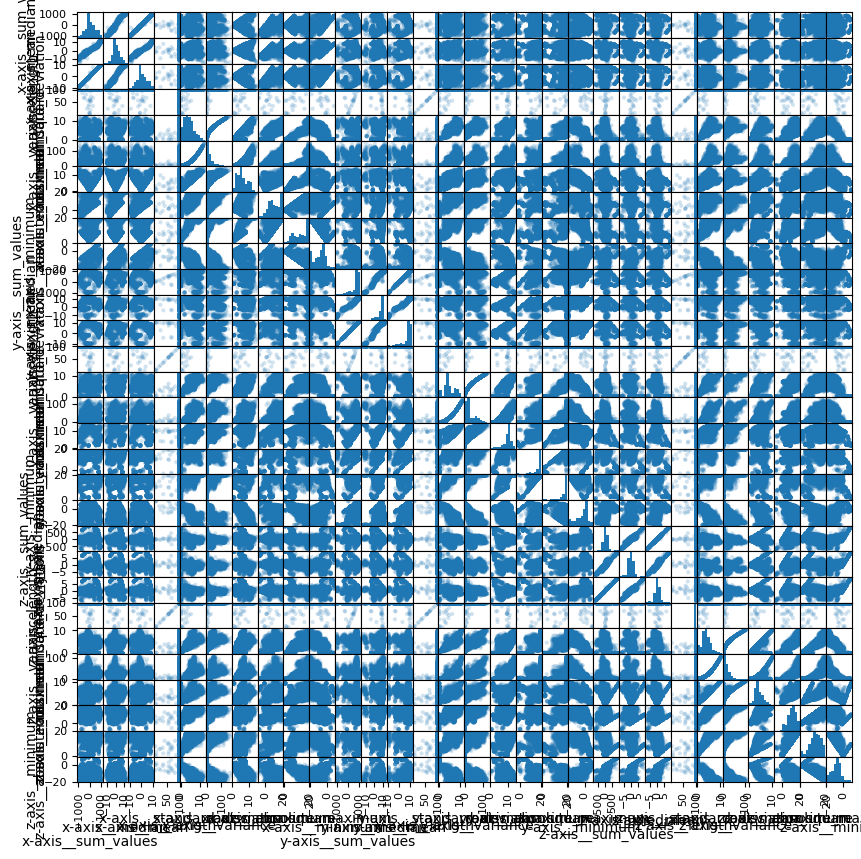

In [ ]:
acceledata_fl=acceledata.select_dtypes(include=['float64'])
pd.plotting.scatter_matrix(acceledata_fl, alpha=0.2, figsize=(10, 10))
plt.show()

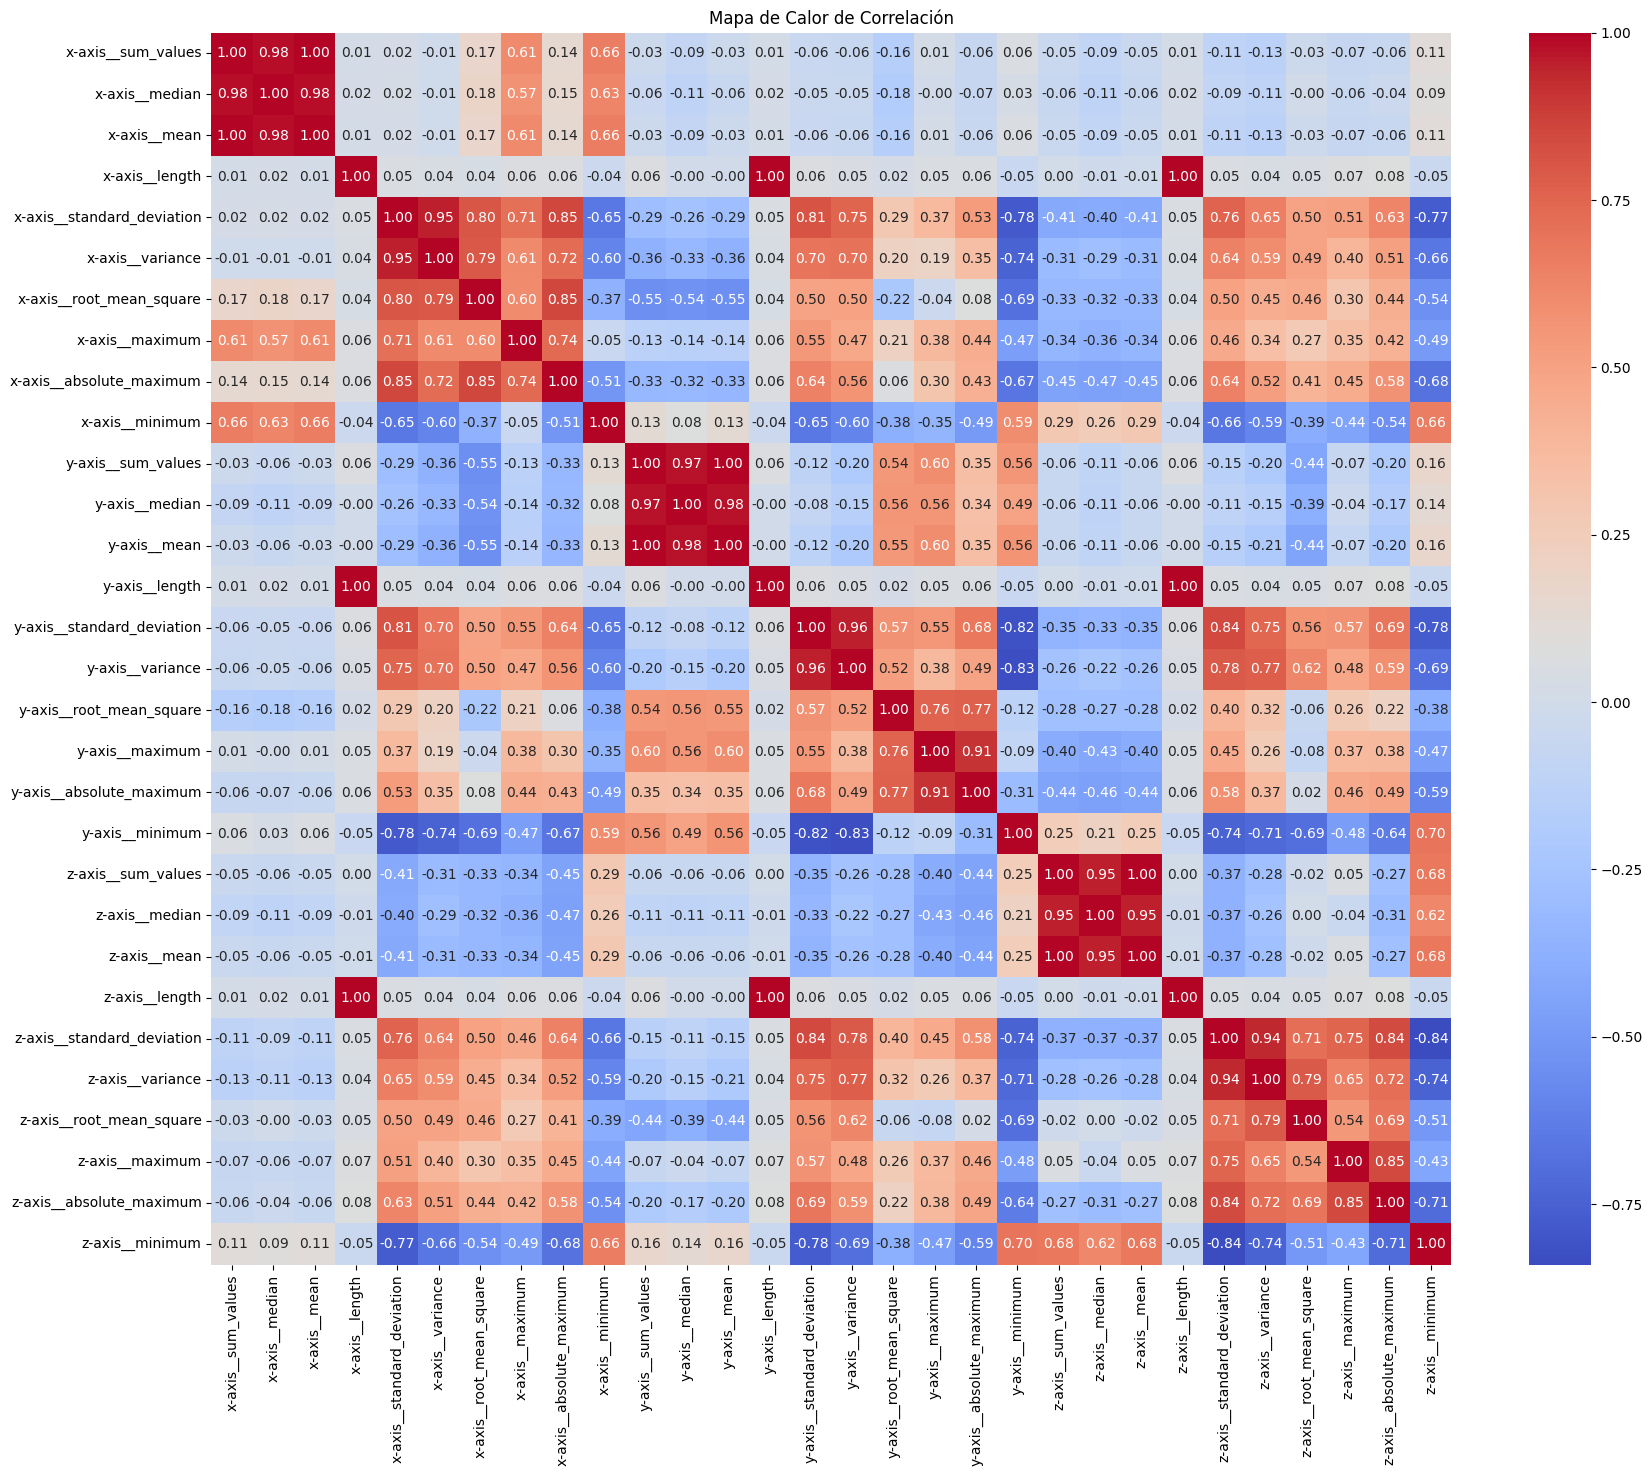

In [ ]:
matriz_correlacion = acceledata_fl.corr()

# Crear el mapa de calor
plt.figure(figsize=(20,16))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlación')
plt.show()

In [ ]:
y_train = acceledata[['activity']]
X_train = acceledata.iloc[:, range(1, 31)]

In [ ]:
#Test set
acceledata_test = pd.read_csv('/content/drive/MyDrive/Coursework/metadata_test.csv')
print(acceledata_test.shape)
acceledata_test.head()

(1934, 32)


,user_snippet,x-axis__sum_values,x-axis__median,x-axis__mean,x-axis__length,x-axis__standard_deviation,x-axis__variance,x-axis__root_mean_square,x-axis__maximum,x-axis__absolute_maximum,x-axis__minimum,y-axis__sum_values,y-axis__median,y-axis__mean,y-axis__length,y-axis__standard_deviation,y-axis__variance,y-axis__root_mean_square,y-axis__maximum,y-axis__absolute_maximum,y-axis__minimum,z-axis__sum_values,z-axis__median,z-axis__mean,z-axis__length,z-axis__standard_deviation,z-axis__variance,z-axis__root_mean_square,z-axis__maximum,z-axis__absolute_maximum,z-axis__minimum,activity
0,3006_0,190.60,1.365,1.9060,100.0,6.192680,38.349290,6.479362,19.50,19.50,-10.46,1042.50,10.895,10.4250,100.0,5.416010,29.333159,11.747927,19.57,19.57,-0.72,-73.61,-0.950,-0.7361,100.0,3.607485,13.013948,3.681819,10.19,10.19,-9.92,Walking
1,3006_1,-115.08,-2.070,-1.1508,100.0,5.779997,33.408361,5.893446,16.82,16.82,-12.49,1052.22,10.590,10.5222,100.0,5.516254,30.429053,11.880478,19.57,19.57,0.61,-13.61,-0.420,-0.1361,100.0,3.551672,12.614374,3.554279,9.47,11.75,-11.75,Walking
2,3006_2,-171.08,-1.710,-1.7108,100.0,5.347172,28.592243,5.614186,13.95,13.95,-11.69,1051.39,10.420,10.5139,100.0,5.421342,29.390952,11.829330,19.57,19.57,0.53,-13.96,-0.480,-0.1396,100.0,2.636698,6.952178,2.640391,8.35,8.50,-8.50,Walking
3,3006_3,633.38,5.790,6.3338,100.0,5.019286,25.193234,8.081476,18.77,18.77,-5.90,915.69,9.130,9.1569,100.0,4.155381,17.267191,10.055646,19.57,19.57,-1.46,26.10,-0.995,0.2610,100.0,4.298020,18.472975,4.305937,11.75,11.75,-8.35,Downstairs
4,3006_4,160.75,1.880,1.6075,100.0,5.769199,33.283657,5.988966,19.50,19.50,-7.78,1035.09,10.440,10.3509,100.0,5.305685,28.150288,11.631484,19.57,19.57,-0.61,-43.41,-0.630,-0.4341,100.0,3.324155,11.050006,3.352380,12.03,12.03,-8.27,Walking


In [ ]:
acceledata_test['activity'].value_counts()

,count
activity,
Walking,768
Jogging,689
Upstairs,238
Downstairs,174
Standing,43
Sitting,22


In [ ]:
y_test = acceledata_test[['activity']]
X_test = acceledata_test.iloc[:, range(1, 31)]

## Aplicación de modelos de machine learning

### Árbol de decisión

In [ ]:
mdl_tree = DecisionTreeClassifier(criterion='gini',max_depth=6, min_samples_leaf=100, class_weight='balanced').fit(X_train, y_train)

In [ ]:
y_pred = mdl_tree.predict(X_test)
y_pred

array(['Walking', 'Downstairs', 'Upstairs', ..., 'Walking', 'Jogging',
       'Jogging'], dtype=object)

[Text(0.4035714285714286, 0.9285714285714286, 'y-axis__variance <= 2.801\ngini = 0.833\nsamples = 6310\nvalue = [1051.667, 1051.667, 1051.667, 1051.667, 1051.667, 1051.667]\nclass = 1'),
 Text(0.14285714285714285, 0.7857142857142857, 'z-axis__root_mean_square <= 3.696\ngini = 0.505\nsamples = 588\nvalue = [0.0, 0.0, 1005.8, 1036.535, 10.487, 0.0]\nclass = 3'),
 Text(0.27321428571428574, 0.8571428571428572, 'True  '),
 Text(0.08571428571428572, 0.6428571428571429, 'x-axis__maximum <= 1.745\ngini = 0.159\nsamples = 305\nvalue = [0.0, 0.0, 88.458, 1028.969, 8.989, 0.0]\nclass = 3'),
 Text(0.05714285714285714, 0.5, 'y-axis__minimum <= 9.06\ngini = 0.012\nsamples = 205\nvalue = [0.0, 0.0, 0.0, 764.161, 4.494, 0.0]\nclass = 3'),
 Text(0.02857142857142857, 0.35714285714285715, 'gini = 0.024\nsamples = 100\nvalue = [0.0, 0.0, 0.0, 366.948, 4.494, 0.0]\nclass = 3'),
 Text(0.08571428571428572, 0.35714285714285715, 'gini = 0.0\nsamples = 105\nvalue = [0.0, 0.0, 0.0, 397.212, 0.0, 0.0]\nclass = 3'

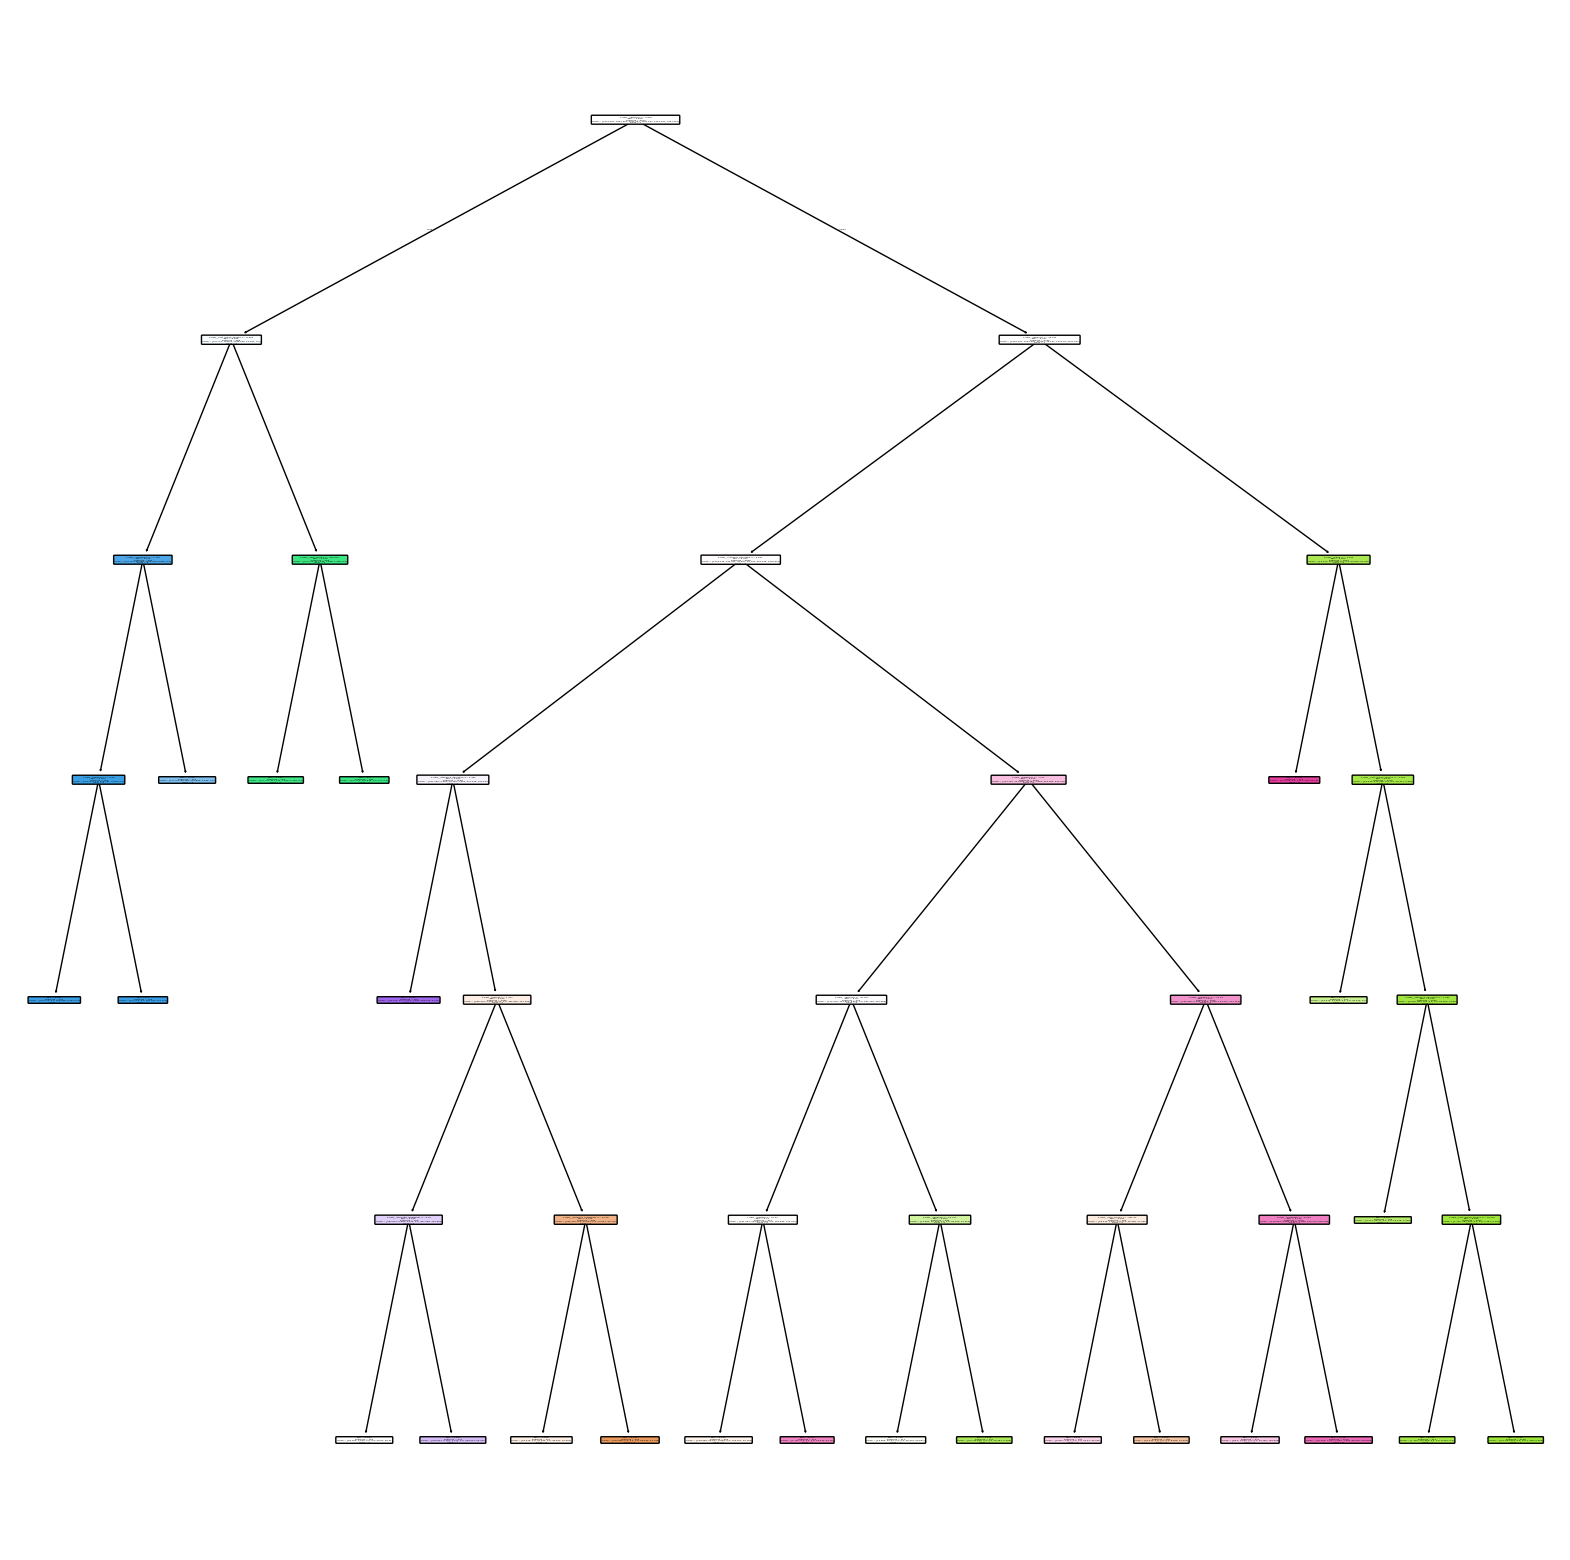

In [ ]:
plt.figure(figsize=(20,20))
tree.plot_tree(mdl_tree, filled=True, rounded=True, class_names=['0','1','2','3','4','5','6','7','8','9'], feature_names=X_train.columns)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy: 0.749224405377456


array([[ 36,   4,   0,   0,  53,  81],
       [  3, 680,   0,   0,   0,   6],
       [  0,   0,  20,   0,   0,   2],
       [  0,   0,   0,  43,   0,   0],
       [ 37,  33,   0,   0, 110,  58],
       [146,   7,   0,   0,  55, 560]])

### Random forest

In [ ]:
accelerandom = RandomForestClassifier(n_estimators=1000, random_state=42, class_weight='balanced')
accelerandom.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', n_estimators=1000,
                       random_state=42)

In [ ]:
y_pred6 = accelerandom.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred6))
confusion_matrix(y_test, y_pred6)

Accuracy: 0.8159255429162358


array([[ 34,   2,   0,   0,  29, 109],
       [  0, 678,   0,   0,   0,  11],
       [  0,   0,  22,   0,   0,   0],
       [  0,   0,  16,  26,   1,   0],
       [ 38,  33,   0,   0, 101,  66],
       [  5,   3,   0,   0,  43, 717]])

In [ ]:
accelekagle=pd.read_csv('/content/drive/MyDrive/Coursework/metadata_kaggle.csv')
print(accelekagle.shape)
user_accelekagle = accelekagle['user_snippet']
accelekagle = accelekagle.drop(columns=['user_snippet'])
accelekagle.head()

(2506, 31)


,x-axis__sum_values,x-axis__median,x-axis__mean,x-axis__length,x-axis__standard_deviation,x-axis__variance,x-axis__root_mean_square,x-axis__maximum,x-axis__absolute_maximum,x-axis__minimum,y-axis__sum_values,y-axis__median,y-axis__mean,y-axis__length,y-axis__standard_deviation,y-axis__variance,y-axis__root_mean_square,y-axis__maximum,y-axis__absolute_maximum,y-axis__minimum,z-axis__sum_values,z-axis__median,z-axis__mean,z-axis__length,z-axis__standard_deviation,z-axis__variance,z-axis__root_mean_square,z-axis__maximum,z-axis__absolute_maximum,z-axis__minimum
0,880.46,8.560,8.8046,100.0,5.146708,26.488599,10.198509,19.53,19.53,-1.04,517.84,4.615,5.1784,100.0,3.806477,14.489265,6.426904,17.24,17.24,-2.49,-6.605867,-0.762740,-0.066059,100.0,3.058799,9.356253,3.059513,9.615966,9.615966,-9.152874
1,552.88,5.520,5.5288,100.0,0.039173,0.001535,5.528939,5.63,5.63,5.43,251.05,2.530,2.5105,100.0,0.028333,0.000803,2.510660,2.56,2.56,2.45,823.670000,8.240000,8.236700,100.0,0.037445,0.001402,8.236785,8.310000,8.310000,8.120000
2,848.84,8.045,8.4884,100.0,4.789062,22.935113,9.746181,19.57,19.57,-1.50,528.33,4.805,5.2833,100.0,3.656953,13.373308,6.425462,14.29,14.29,-2.79,-7.995144,-0.211115,-0.079951,100.0,3.178891,10.105348,3.179896,9.656827,9.656827,-7.014479
3,100.93,0.990,1.0093,100.0,0.044525,0.001983,1.010282,1.12,1.12,0.89,992.36,9.920,9.9236,100.0,0.020373,0.000415,9.923621,10.00,10.00,9.89,29.770000,0.310000,0.297700,100.0,0.032058,0.001028,0.299421,0.340000,0.340000,0.190000
4,845.52,7.970,8.4552,100.0,4.858636,23.606345,9.751756,19.57,19.57,-2.45,523.32,4.770,5.2332,100.0,3.628599,13.166734,6.368133,15.51,15.51,-2.83,1.757024,-0.483522,0.017570,100.0,3.475728,12.080686,3.475773,10.310603,10.310603,-9.956474


In [ ]:
predict_randomf = accelerandom.predict(accelekagle)

In [ ]:
resultados = pd.DataFrame({
    'user_snippet': user_accelekagle,
    'prediction': predict_randomf
})
resultados

,user_snippet,prediction
0,8054_0,Walking
1,8054_1,Sitting
2,8054_2,Walking
3,8054_3,Standing
4,8054_4,Walking
...,...,...
2501,8488_355,Jogging
2502,8488_356,Walking
2503,8488_357,Jogging
2504,8488_358,Walking


In [ ]:
#Primeros resultados del random forest enviados en el concuros de kaggle el 7 de noviembre de 2025
resultados.to_csv('/content/drive/MyDrive/Coursework/predictions_IvHubMetrics.csv', index=False)

## Regresión Logística

### Por regularización Lasso

### Por regularización Ridged

### Por Análisis de componentes principales (PCA)

## Redes Neuronales (Multilayer Perceptron - MLP)

## Support Vector Machine

## Gradient Boosting Machine (GBM)